## Import the libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [118]:
warnings.filterwarnings('ignore')

## Read the dataset

In [119]:
df = pd.read_csv('shein_mens_fashion (1).csv')
df

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men Plus Size T-Shirt Co-ords,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,Men Plus Size Polo Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27356789,sm2311175426657720,https://us.shein.com/Manfinity-AFTRDRK-Men-s-P...,Manfinity AFTRDRK Men's Patchwork Lapel Single...,Blue,28.35,$28.35,41.09,$41.09,31,Men Suits,2484,Color: Blue\nStyle: Work\nStyle: Party\nPatter...,100,4.86
996,11631429,sm2209135287061185,https://us.shein.com/Manfinity-Hypemode-Loose-...,Manfinity Hypemode Loose Fit Men's Straight Le...,Light Wash,18.42,$18.42,27.49,$27.49,33,Men Jeans,1989,Color: Light Wash\nPattern Type: Floral\nDetai...,500,4.86
997,21765230,sm2112156721129940,https://us.shein.com/Manfinity-RSRT-Men-Tropic...,Manfinity RSRT Men Tropical Print Shirt & Draw...,Mint Green,17.49,$17.49,20.49,$20.49,15,Men Shirt Co-ords,9037,Color: Mint Green\nStyle: Boho\nPattern Type: ...,1000,4.92
998,20870851,sm2306162921275518,https://us.shein.com/Men-Solid-Button-Up-Shirt...,Men Solid Button Up Shirt,Beige,10.34,$10.34,11.49,$11.49,10,Men Shirts,1979,Color: Beige\nStyle: Casual\nPattern Type: Pla...,100,4.89


In [120]:
## Check shape

df.shape

(1000, 15)

In [121]:
df.columns

Index(['product_id', 'sku', 'url', 'title', 'color', 'sale_price/amount',
       'sale_price/amount_with_symbol', 'retail_price/amount',
       'retail_price/amount_with_symbol', 'discount_percentage',
       'category_name', 'category_id', 'description', 'reviews_count',
       'average_rating'],
      dtype='object')

# Handle null values

In [122]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res

In [123]:
fetch_count_and_percent_of_null(df)

,Feature,Count_Null,Percent_Null


In [124]:
## Hence there is no null values

### Handle Duplicates

In [125]:
df.duplicated().sum()

0

In [126]:
## Hence there is no duplicate value.

In [127]:
df.describe()

,product_id,sale_price/amount,retail_price/amount,discount_percentage,category_id,reviews_count,average_rating
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.931134e+07,12.645300,16.54844,22.741000,3150.686000,533.81700,4.667020
std,7.517931e+06,5.746236,7.58736,12.731693,2302.790795,435.50684,1.056461
min,6.782140e+05,3.170000,6.59000,0.000000,1974.000000,0.00000,0.000000
25%,1.394833e+07,8.840000,11.39000,13.000000,1979.000000,100.00000,4.870000
50%,2.038585e+07,11.490000,13.99000,25.000000,1980.000000,500.00000,4.920000
75%,2.576541e+07,15.490000,20.71500,31.000000,2484.000000,1000.00000,4.960000
max,3.088667e+07,60.490000,69.79000,70.000000,9042.000000,1000.00000,5.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       1000 non-null   int64  
 1   sku                              1000 non-null   object 
 2   url                              1000 non-null   object 
 3   title                            1000 non-null   object 
 4   color                            1000 non-null   object 
 5   sale_price/amount                1000 non-null   float64
 6   sale_price/amount_with_symbol    1000 non-null   object 
 7   retail_price/amount              1000 non-null   float64
 8   retail_price/amount_with_symbol  1000 non-null   object 
 9   discount_percentage              1000 non-null   int64  
 10  category_name                    1000 non-null   object 
 11  category_id                      1000 non-null   int64  
 12  description          

# Feature engineering

In [129]:
df.columns

Index(['product_id', 'sku', 'url', 'title', 'color', 'sale_price/amount',
       'sale_price/amount_with_symbol', 'retail_price/amount',
       'retail_price/amount_with_symbol', 'discount_percentage',
       'category_name', 'category_id', 'description', 'reviews_count',
       'average_rating'],
      dtype='object')

In [130]:
df['title'].nunique

<bound method IndexOpsMixin.nunique of 0            Manfinity Homme Men Plus Solid Tee & Shorts
1      ROMWE Street Life Men's Short Sleeve T-Shirt W...
2      Manfinity Men Contrast Panel Drawstring Sweatp...
3      Manfinity Homme Men's Plus Size Striped Trim S...
4      Mens Fitness Taco Funny T Shirt Humorous Gym G...
                             ...                        
995    Manfinity AFTRDRK Men's Patchwork Lapel Single...
996    Manfinity Hypemode Loose Fit Men's Straight Le...
997    Manfinity RSRT Men Tropical Print Shirt & Draw...
998                            Men Solid Button Up Shirt
999    Manfinity Homme Men's Loose Fit Solid Color La...
Name: title, Length: 1000, dtype: object>

In [131]:
df.columns

Index(['product_id', 'sku', 'url', 'title', 'color', 'sale_price/amount',
       'sale_price/amount_with_symbol', 'retail_price/amount',
       'retail_price/amount_with_symbol', 'discount_percentage',
       'category_name', 'category_id', 'description', 'reviews_count',
       'average_rating'],
      dtype='object')

In [132]:
df.drop(['product_id', 'sku', 'url', 'title','sale_price/amount_with_symbol',
         'retail_price/amount_with_symbol','category_id'],axis=1,inplace = True)

In [133]:
df.columns

Index(['color', 'sale_price/amount', 'retail_price/amount',
       'discount_percentage', 'category_name', 'description', 'reviews_count',
       'average_rating'],
      dtype='object')

In [134]:
df.drop('description',axis=1,inplace=True)

In [135]:
df.columns

Index(['color', 'sale_price/amount', 'retail_price/amount',
       'discount_percentage', 'category_name', 'reviews_count',
       'average_rating'],
      dtype='object')

In [136]:
df['color'].value_counts

<bound method IndexOpsMixin.value_counts of 0            White
1            Black
2        Navy Blue
3          Apricot
4      Heather Red
          ...     
995           Blue
996     Light Wash
997     Mint Green
998          Beige
999     Dusty Pink
Name: color, Length: 1000, dtype: object>

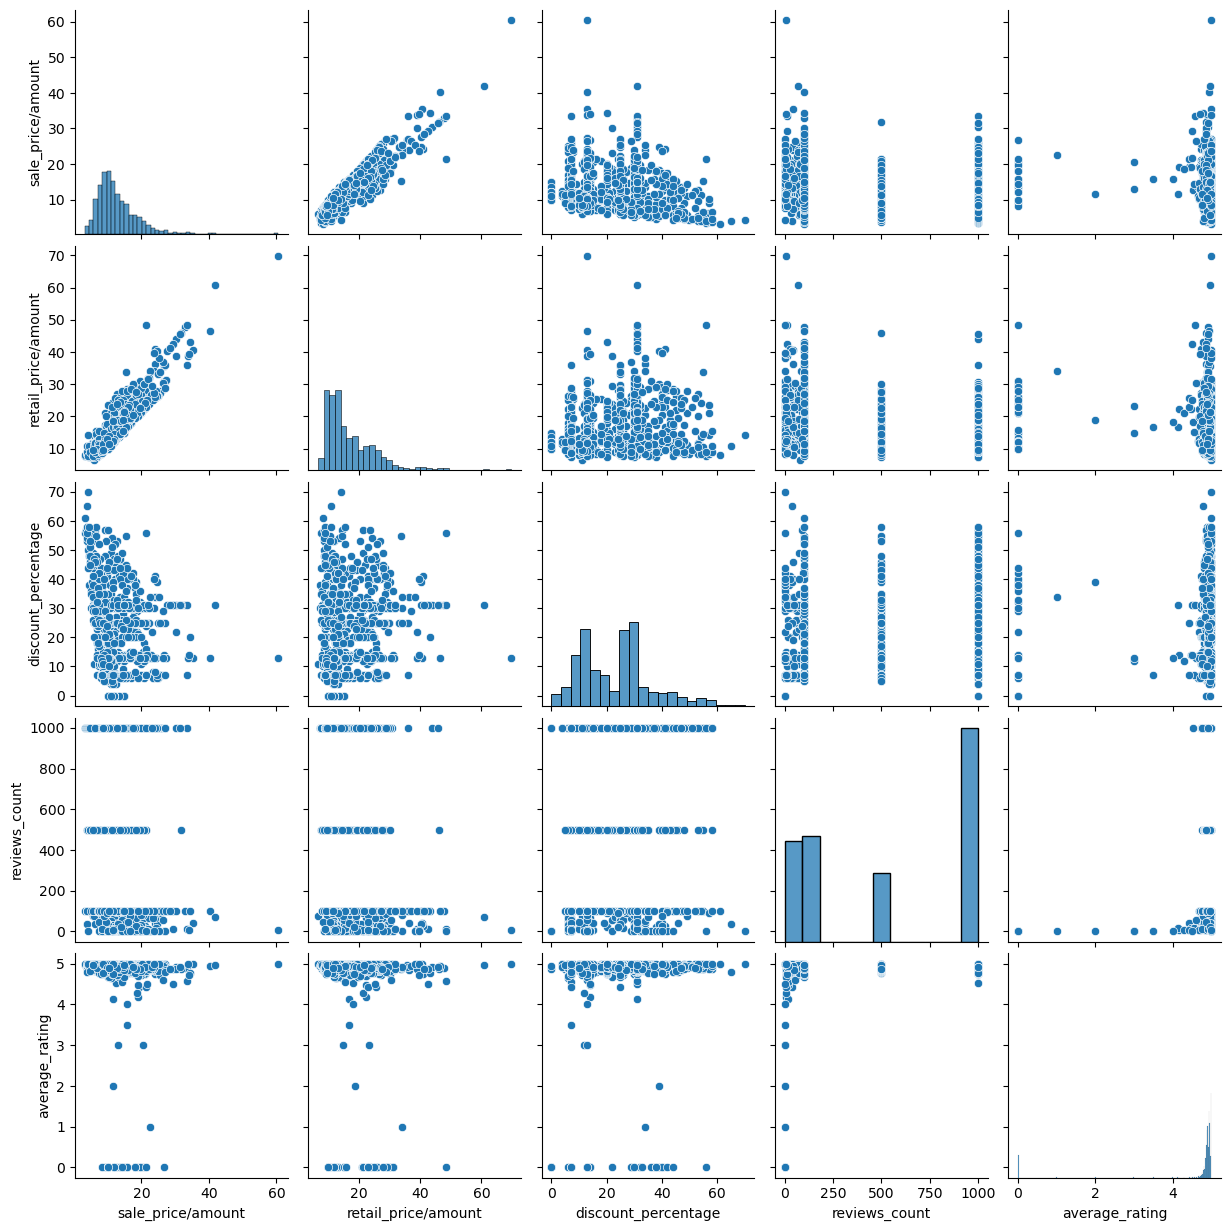

In [137]:
import seaborn as sns 
sns.pairplot(df)

## EDA

In [138]:
df.columns

Index(['color', 'sale_price/amount', 'retail_price/amount',
       'discount_percentage', 'category_name', 'reviews_count',
       'average_rating'],
      dtype='object')

In [139]:
df['color'].value_counts()

Black                              196
Multicolor                         149
White                              104
Khaki                               67
Apricot                             31
Grey                                31
Navy Blue                           29
Dark Grey                           29
Army Green                          26
Blue                                22
Light Wash                          20
Green                               20
Black and White                     19
Light Grey                          18
Pink                                17
Beige                               16
Burgundy                            15
Red                                 14
Dusty Blue                          13
Baby Blue                           12
Dark Green                          12
Brown                               12
Mint Green                          11
Medium Wash                         10
Coffee Brown                         9
Blue and White           

In [140]:
category_mapping = {'Apricot':'Orange' , 'Dark Grey':'Grey','Army Green':'Green',
   'Light Wash':'Blue','Light Grey':'Grey','Dusty Blue':'Blue','Baby Blue':'Blue',
    'Dark Green':'Green','Mint Green':'Green','Hot Pink':'Pink','Violet Purple':'Purple',
     'Mauve Purple':'Purple','Teal Blue':'Blue','Bronze':'Brown','Heather Green':'Green',
    'Heather Navy - UNIPORN':'Heather Navy','Heather Red - DICKENS':'Red',
    'Light Heather Blue - PEN':'Blue','Heather Navy - Kid Has Practice':'Heather Navy',
    'Mustard Yellow':'Yellow','Dark Heather Grey':'Grey','Coral Pink':'Pink','Heather Red':'Red',
        'Light Heather Grey':'Grey','Heather Navy - MATH':'Heather Navy',
    'Heather Black - 100% Chance':'Black','Dark Heather Grey - BOOK':'Grey',
'Heather Navy - MATH':'Heather Navy','Heather Light Blue':'Blue','Red and White':'Multicolor',
        'Lilac Purple':'Purple','Blue and White':'Multicolor','Black and White':'Multicolor'}

In [141]:
ch1 = {'Navy Blue':'Blue','Coffee Brown':'Brown','Heather Black':'Black','Royal Blue':'Blue',
      'Baby Pink':'Pink','Camel':'Brown','Burnt Orange':'Orange','Mint Blue':'Blue',
       'Chocolate Brown':'Brown','Dusty Pink':'Pink'}

In [142]:
df['color']=df['color'].replace(ch1)

In [143]:
df['color']=df['color'].replace(category_mapping)

In [144]:
df['color'].value_counts()

Black           205
Multicolor      178
Blue            110
White           104
Grey             81
Green            70
Khaki            67
Orange           40
Brown            31
Pink             30
Beige            16
Red              16
Burgundy         15
Medium Wash      10
Dark Wash         8
Yellow            8
Purple            7
Heather Navy      4
Name: color, dtype: int64

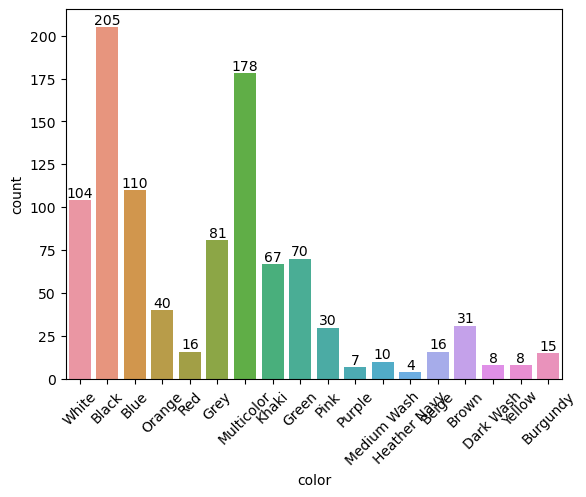

In [145]:
ax=sns.countplot(data=df,x=df['color'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

## Inference <br>

It looks like shein prefer black, multicolour and white most .

In [146]:
#now we will check avg price product uner different color category

average_price_by_color = df.groupby('color')['sale_price/amount'].mean()
print(average_price_by_color)

color
Beige           12.003750
Black           11.775951
Blue            13.956818
Brown           12.870968
Burgundy        14.106000
Dark Wash       19.440000
Green           11.907143
Grey            12.615679
Heather Navy    11.490000
Khaki           11.973284
Medium Wash     18.158000
Multicolor      13.699101
Orange          12.040500
Pink            12.185333
Purple          12.117143
Red             14.318750
White           11.131154
Yellow          11.938750
Name: sale_price/amount, dtype: float64


In [147]:
#now we will check avg price product uner different color category

average_price_by_color_retail = df.groupby('color')['retail_price/amount'].mean()
print(average_price_by_color_retail)

#checking the same thing but this time for the retail price of the color cateory here

color
Beige           15.652500
Black           15.587073
Blue            18.197091
Brown           16.854516
Burgundy        18.684667
Dark Wash       24.902500
Green           14.900000
Grey            16.650617
Heather Navy    11.490000
Khaki           15.707910
Medium Wash     24.730000
Multicolor      18.420899
Orange          15.552750
Pink            15.520000
Purple          15.648571
Red             17.484375
White           14.323654
Yellow          14.502500
Name: retail_price/amount, dtype: float64


In [30]:
df['category_name'].value_counts()

Men T-Shirts                                 224
Men Shirts                                    81
Men Shorts                                    78
Men Polo Shirts                               69
Men Jeans                                     66
Men Beach Shorts                              63
Men T-Shirt Co-ords                           57
Men Pants                                     55
Men Shirt Co-ords                             35
Men Sweatpants                                33
Men Plus Size T-Shirts                        25
Men Hoodies                                   22
Men Plus Size Shirts                          19
Men Sweatshirts                               16
Men Plus Size T-Shirt Co-ords                 15
Men Plus Size Shirt Co-ords                   15
Men Jackets & Coats                           15
Men Suits                                     10
Men Suit Pants                                10
Men Hoodie & Sweatshirt Co-ords                9
Men Sweaters        

In [31]:
ch = {'Men Polo Shirts':'Men T-Shirts','Men Beach Shorts':'Men Shorts',
'Men Sweatpants':'Men Pants','Men Plus Size T-Shirts':'Men T-Shirts',
'Men Plus Size Shirts':'Men Shirts','Men Plus Size T-Shirt Co-ords':'Men T-Shirt Co-ords',
'Men Plus Size Shirt Co-ords':'Men Shirt Co-ords','Men Hoodie & Sweatshirt Co-ords':'Men Hoodies',
'Men Plus Size Polo Shirts':'Men T-Shirts','Men Zip-up Hoodies':'Men Hoodies','Men Plus Size Suits':'Men Suits',
'Men Denim Shorts':'Men Shorts','Men Plus Size Shorts':'Men Shorts','Men Plus Size Jackets & Coats':'Men Jackets & Coats',
'Men Plus Size Pants':'Men Pants','Men Plus Size Jeans':'Men Jeans','Men Denim Shirts':'Men Shirts',
'Men Plus Size Beach Shorts':'Men Shorts','Men Knit Tops':'Men Tops','Men Tank Tops':'Men Tops',
'Men Outerwear Co-ords':'Men Co-ords','Men Denim Jackets':'Men Jackets','Men Plus Size Hoodies':'Men Hoodies',
'Men Plus Size Hoodie & Sweatshirt Co-ords':'Men Hoodies','Men Plus Size Polo Co-ords':'Men Co-ords',
'Men Plus Size Blazers':'Men Blazers','Men Winter Coats':'Men Coats','Men Plus Size Denim Shirts':'Men Shirts',
'Men Polo Co-ords':'Men Co-ords','Men Plus Size Sweatshirts':'Men Sweatshirts','Men Plus Size Tank Tops':'Men Tops',
'Men Plus Size Outerwear Co-ords':'Men Co-ords','Men Plus Size Trench Coats':'Men Coats'}

In [32]:
ch2 = {'Men T-Shirt Co-ords':'Men Co-ords','Men Shirt Co-ords':'Men Co-ords'}

In [33]:
df['category_name']=df['category_name'].replace(ch2)

In [34]:
df['category_name']=df['category_name'].replace(ch)

In [35]:
df['category_name'].value_counts()

Men T-Shirts           325
Men Shorts             153
Men Shirts             103
Men Co-ords             97
Men Pants               92
Men Jeans               69
Men Hoodies             41
Men Jackets & Coats     19
Men Sweatshirts         17
Men T-Shirt Co-ords     15
Men Suits               15
Men Shirt Co-ords       15
Men Suit Pants          10
Men Tops                 9
Men Sweaters             8
Men Blazers              5
Men Jackets              2
Men Coats                2
Men Overcoats            1
Men Cardigans            1
Men Shackets             1
Name: category_name, dtype: int64

### Hence most popular category is Men's T-shirts,shorts & shirts.

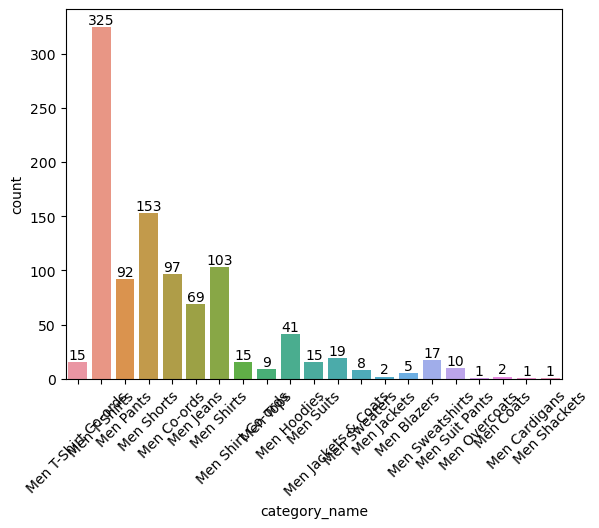

In [36]:
ax=sns.countplot(data=df,x=df['category_name'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

In [37]:
df.columns

Index(['color', 'sale_price/amount', 'retail_price/amount',
       'discount_percentage', 'category_name', 'reviews_count',
       'average_rating'],
      dtype='object')

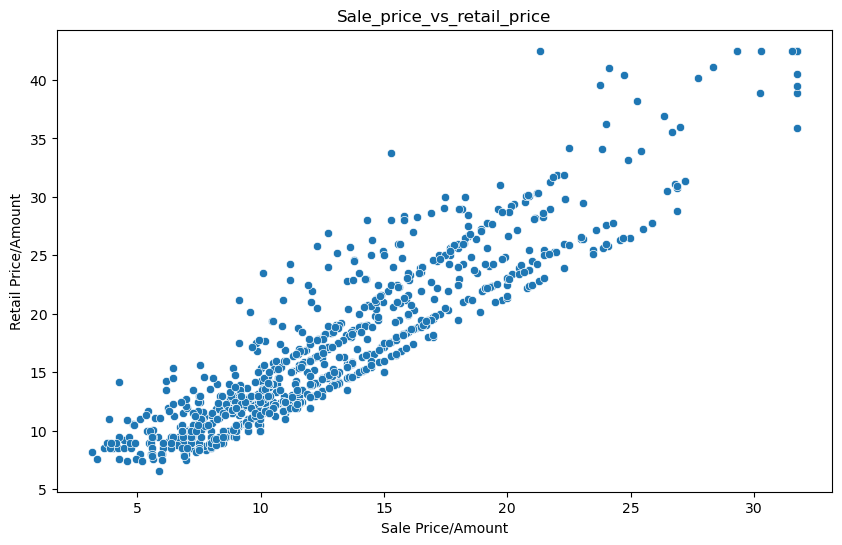

In [108]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['sale_price/amount'], y= df['retail_price/amount'])

plt.title('Sale_price_vs_retail_price')
plt.xlabel('Sale Price/Amount')
plt.ylabel('Retail Price/Amount')

plt.show()


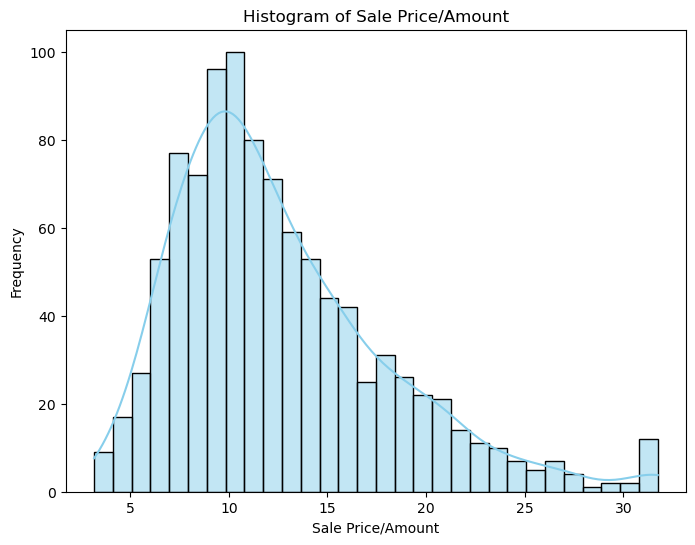

In [109]:
plt.figure(figsize=(8, 6))  
sns.histplot(df['sale_price/amount'], bins=30, kde=True, color='skyblue')  # Histogram
plt.title('Histogram of Sale Price/Amount')  
plt.xlabel('Sale Price/Amount')
plt.ylabel('Frequency') 
plt.show() 

## Inference  :-

#### The graph shows that the Sales Price/Quantity data is generally concentrated around 10. This indicates that most of the products are sold around this price and 10 is an average price.However, we also see that products sold at prices in the range 10-20 are quite common.These products may be slightly more expensive than 10 and may account for a significant proportion of total sales.Products sold at prices above 30 are quite rare.

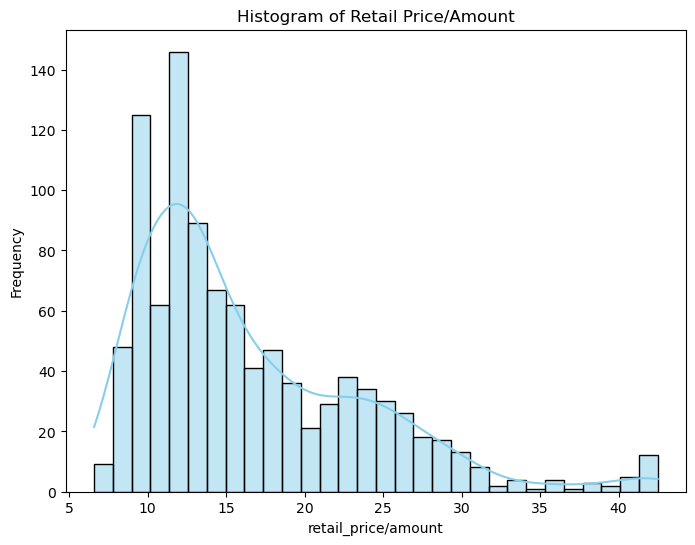

In [110]:
plt.figure(figsize=(8, 6))
sns.histplot(df['retail_price/amount'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Retail Price/Amount')
plt.xlabel('retail_price/amount') 
plt.ylabel('Frequency')
plt.show()

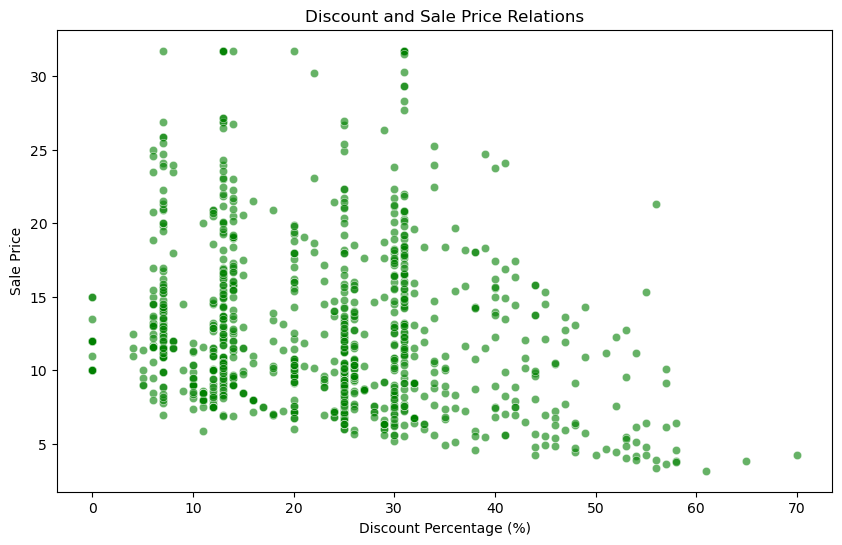

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='sale_price/amount', data=df, color='green', alpha=0.6)
plt.title('Discount and Sale Price Relations')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Sale Price')

plt.show()

#### The fact that most of the products are priced around 10 may indicate that a customer base with high price sensitivity is addressed.The presence of products priced in the range of 20-30 may indicate a desire to appeal to different price segments.The scarcity of products cheaper than 10 or more expensive than 50 may indicate that these price ranges are not suitable for the target audience or that there is a stock problem.The information in the histogram can be used to create new product development strategies. For example, given that products priced around 10 are in demand, new products can be developed in this price range.Likewise, given that products priced in the 20-30 range are also in demand, products with different features or higher quality products can be developed in this price range.

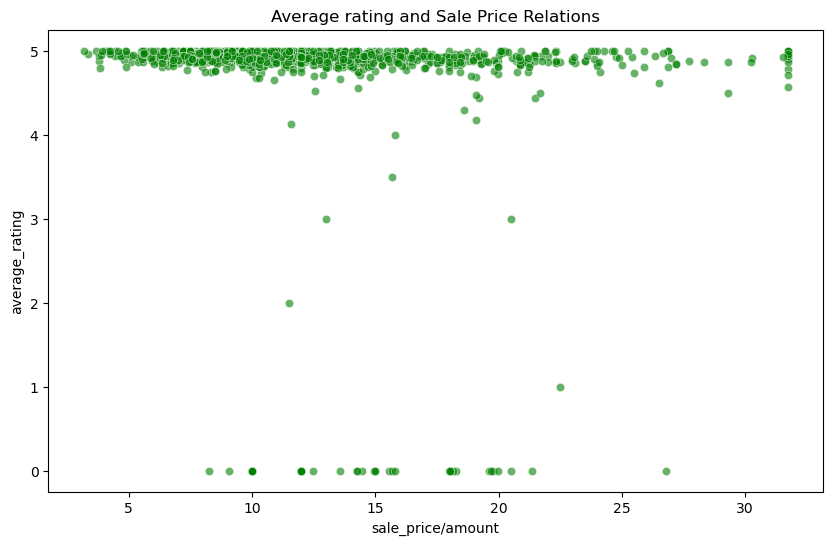

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sale_price/amount', y='average_rating', data=df, color='green', alpha=0.6)
plt.title('Average rating and Sale Price Relations')
plt.xlabel('sale_price/amount')
plt.ylabel('average_rating')

plt.show()

### Looking at the graph, it can be seen that Average Evaluation has a positive correlation with Sales Price/Quantity in general.In other words, we can see that the average evaluation of products with higher prices also tends to be higher.

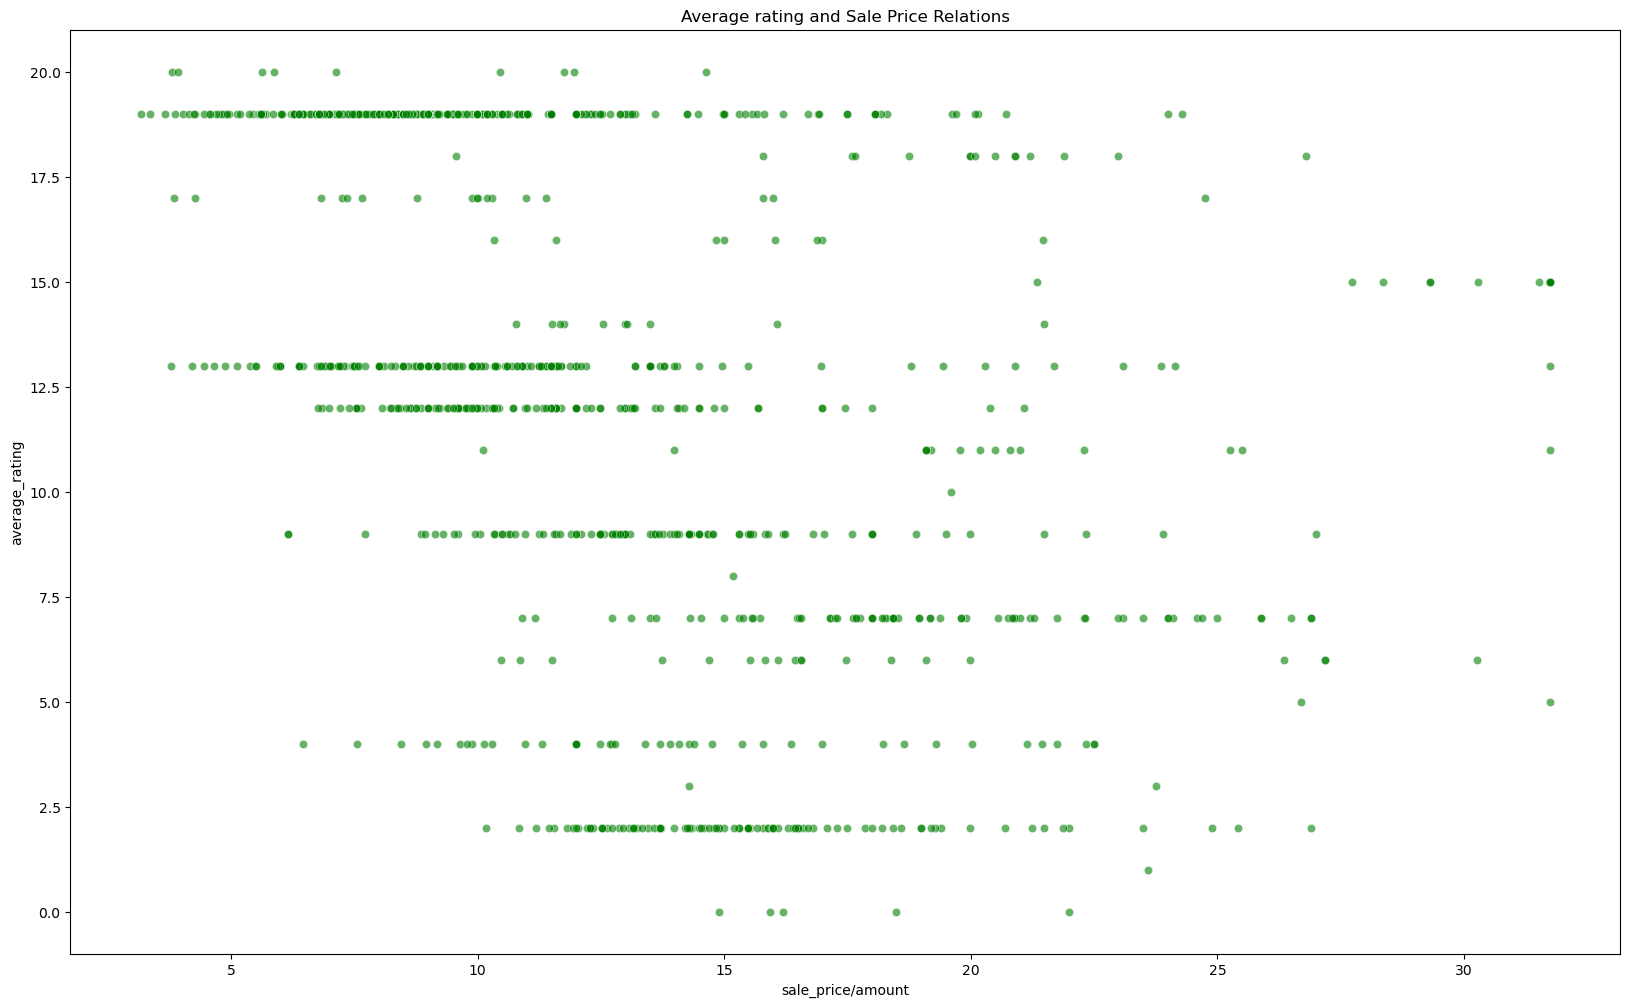

In [113]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='sale_price/amount', y='category_name', data=df, color='green', alpha=0.6)
plt.title('Average rating and Sale Price Relations')
plt.xlabel('sale_price/amount')
plt.ylabel('average_rating')

plt.show()

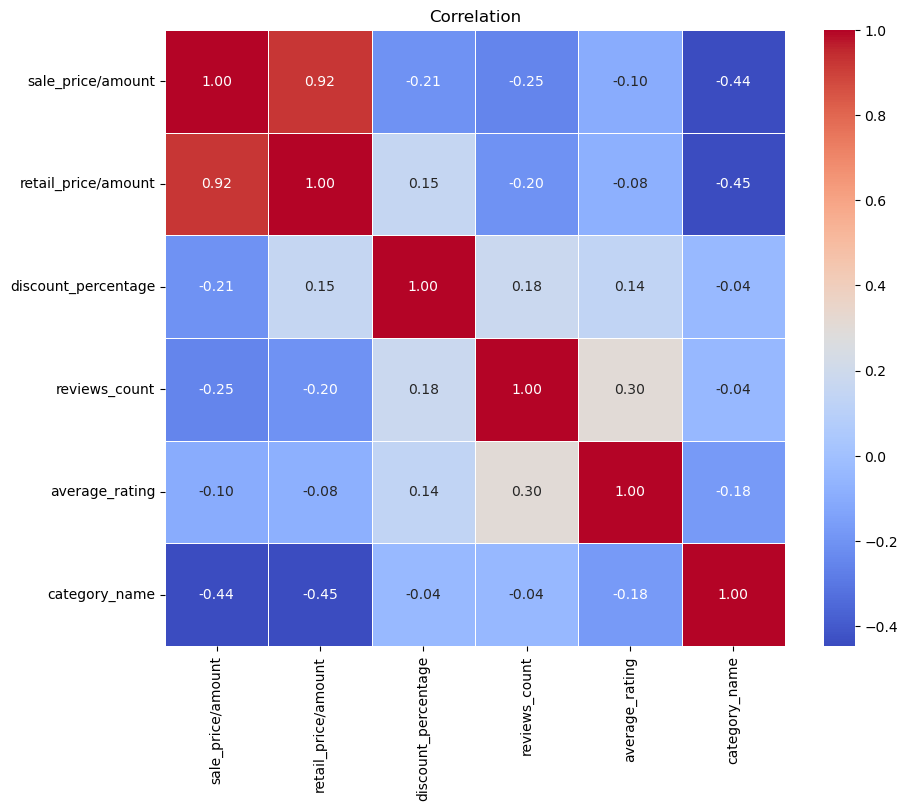

In [115]:
correlation_matrix = df[['sale_price/amount', 'retail_price/amount', 'discount_percentage', 'reviews_count', 'average_rating','category_name']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation')
plt.show()


## Seperate numerical and categorical features

In [38]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index

In [39]:
print(cat_cols)
print(num_cols)

Index(['color', 'category_name'], dtype='object')
Index(['sale_price/amount', 'retail_price/amount', 'discount_percentage',
       'reviews_count', 'average_rating'],
      dtype='object')


### Treating Outliers

In [40]:
a=df.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T
a.iloc[:,3:]

,min,1%,2%,3%,50%,97%,98%,99%,max
sale_price/amount,3.17,4.2094,4.749,5.3794,11.49,25.502,26.994,31.7431,60.49
retail_price/amount,6.59,7.8900,8.186,8.4900,13.99,33.793,38.890,42.4960,69.79
discount_percentage,0.00,0.0000,0.000,5.0000,25.00,52.000,54.000,57.0000,70.00
reviews_count,0.00,0.0000,0.000,0.0000,500.00,1000.000,1000.000,1000.0000,1000.00
average_rating,0.00,0.0000,0.000,0.0000,4.92,5.000,5.000,5.0000,5.00


In [41]:
right_skewed_cols=['sale_price/amount','retail_price/amount']

In [42]:
def ot_rightskewed(x):
    x=x.clip(upper=x.quantile(0.99))
    return x

In [43]:
df[right_skewed_cols]=df[right_skewed_cols].apply(ot_rightskewed)

In [44]:
a=df.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T
a.iloc[:,3:]

,min,1%,2%,3%,50%,97%,98%,99%,max
sale_price/amount,3.17,4.2094,4.749,5.3794,11.49,25.502,26.994,31.730131,31.7431
retail_price/amount,6.59,7.8900,8.186,8.4900,13.99,33.793,38.890,42.490060,42.4960
discount_percentage,0.00,0.0000,0.000,5.0000,25.00,52.000,54.000,57.000000,70.0000
reviews_count,0.00,0.0000,0.000,0.0000,500.00,1000.000,1000.000,1000.000000,1000.0000
average_rating,0.00,0.0000,0.000,0.0000,4.92,5.000,5.000,5.000000,5.0000


## Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [47]:
df.columns

Index(['color', 'sale_price/amount', 'retail_price/amount',
       'discount_percentage', 'category_name', 'reviews_count',
       'average_rating'],
      dtype='object')

In [48]:
# Fit the LabelEncoder to your data and transform the desired column
df['color'] = label_encoder.fit_transform(df['color'])

In [49]:
df['color'].value_counts()

1     205
11    178
2     110
16    104
7      81
6      70
9      67
12     40
3      31
13     30
0      16
15     16
4      15
10     10
5       8
17      8
14      7
8       4
Name: color, dtype: int64

In [50]:
df['category_name'] = label_encoder.fit_transform(df['category_name'])

In [51]:
df['category_name'].value_counts()

19    325
13    153
12    103
2      97
9      92
7      69
4      41
6      19
17     17
18     15
15     15
11     15
14     10
20      9
16      8
0       5
5       2
3       2
8       1
1       1
10      1
Name: category_name, dtype: int64

## Select X and Y 

In [52]:
df

,color,sale_price/amount,retail_price/amount,discount_percentage,category_name,reviews_count,average_rating
0,16,18.74,26.39,29,18,64,4.98
1,1,9.24,12.49,26,19,100,4.95
2,2,6.15,14.29,57,9,1000,4.87
3,12,13.19,14.99,12,19,24,4.92
4,15,11.99,11.99,0,19,0,0.00
...,...,...,...,...,...,...,...
995,2,28.35,41.09,31,15,100,4.86
996,2,18.42,27.49,33,7,500,4.86
997,6,17.49,20.49,15,2,1000,4.92
998,0,10.34,11.49,10,12,100,4.89


In [53]:
df.dtypes

color                    int32
sale_price/amount      float64
retail_price/amount    float64
discount_percentage      int64
category_name            int32
reviews_count            int64
average_rating         float64
dtype: object

In [54]:
x=df.drop(['sale_price/amount'],axis=1)
y=df['sale_price/amount']

In [55]:
print(x.shape)
print(y.shape)

(1000, 6)
(1000,)


## VIF(Variance inflation factor)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif=vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
5,average_rating,12.483470
1,retail_price/amount,5.392199
2,discount_percentage,4.583608
3,category_name,4.294131
4,reviews_count,2.971296
0,color,2.884014


## Inference : -
## No multicolinearity

## Target variable is normally distributed

In [58]:
from scipy.stats import jarque_bera,shapiro  ## Less Than 5000 Shapiro.

### Simple(y)

In [59]:
test_stat,p=jarque_bera(y)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

6.885292848489506e-61
Target Variable is Not Normally Distributed


### log(y)

In [60]:
y1=np.log(y)

In [61]:
test_stat,p=shapiro(y1)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

0.03251431882381439
Target Variable is Not Normally Distributed


### Exp(y)

In [62]:
y2=np.exp(y)

In [63]:
test_stat,p=shapiro(y2)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

0.0
Target Variable is Not Normally Distributed


### 1/log(y)

In [64]:
y3=1/(np.log(y))

In [65]:
test_stat,p=shapiro(y3)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

1.162616487330702e-21
Target Variable is Not Normally Distributed


### Boxcox

In [66]:
from scipy.stats import boxcox

In [67]:
y4,i=boxcox(y)

In [68]:
test_stat,p=shapiro(y4)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

0.03266911208629608
Target Variable is Not Normally Distributed


## OLS Model := 1

In [69]:
x1=x.copy()
y5=y4.copy()

In [70]:
import statsmodels.api as sm

In [71]:
x1=sm.add_constant(x1)
ols_m1=sm.OLS(y5,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3976.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:14:00   Log-Likelihood:                 1063.8
No. Observations:                1000   AIC:                            -2114.
Df Residuals:                     993   BIC:                            -2079.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0628      0.019    107.050      0.000       2.025       2.101
color                   0.0004      0.001      0.769      0.442      -0.001       0.001
retail_price/amount     0.0510      0.000    116.835      0.000       0.050       0.052
discount_percentage    -0.0143      0.000    -65.705      0.000      -0.015      -0.014
category_name          -0.0086      0.001    -16.357      0.000      -0.010      -0.008
reviews_count        3.564e-06   6.68e-06      0.534      0.594   -9.54e-06    1.67e-05
average_rating         -0.0064      0.003     -2.374      0.018      -0.012      -0.001
==============================================================================
Omnibus:                      176.208   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.051
Skew:                          -1.020   Prob(JB):                     2.17e-77
Kurtosis:                       5.076   Cond. No.                     5.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
print("OLS Model = 1")
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS Model = 1
0.9600340008633068
0.9597925144636893


### Homoscadesicity Check

In [73]:
yaxis=ols_m1.resid
xaxis=ols_m1.predict()

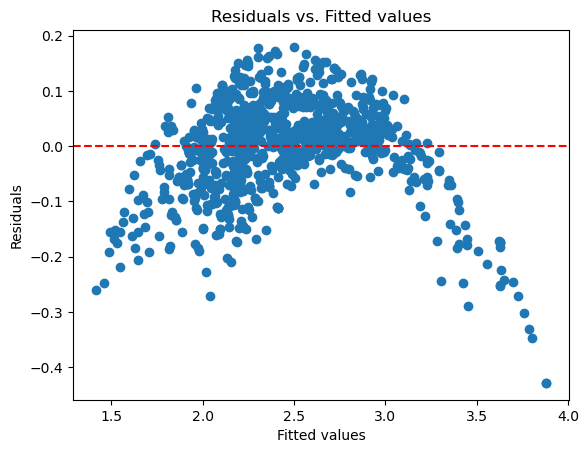

In [74]:
plt.scatter(xaxis,yaxis)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

### Split Into Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y4,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 6)
(250, 6)
(750,)
(250,)


### Advanced Function Which calculate all models scores

In [77]:
from sklearn.metrics import *

In [78]:
def eval_regression(model,x_train,x_test,y_train,y_test,modelname):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,y_pred)
    test_mse = mean_squared_error(y_test,y_pred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res,y_pred

## Importing The Models

In [79]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

### Linear Regression

In [80]:
lr=LinearRegression()

In [81]:
lr_res,lr_pred=eval_regression(lr,x_train,x_test,y_train,y_test,'Lin_Reg')
lr_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.959866,0.959559,0.064815,0.006934,0.083273


### Ridge

In [82]:
rr=Ridge()

In [83]:
rr_res,rr_pred=eval_regression(rr,x_train,x_test,y_train,y_test,'Ridge_Reg')
rr_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Ridge_Reg,0.959866,0.959555,0.064818,0.006935,0.083276


### Lasso

In [84]:
Lr=Lasso()

In [85]:
Lr_res,Lr_pred=eval_regression(Lr,x_train,x_test,y_train,y_test,'Lasso_Reg')
Lr_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lasso_Reg,0.773155,0.754293,0.164206,0.042131,0.205258


### Decision Tree Regreesor

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
dt1=DecisionTreeRegressor(criterion='squared_error') 
dt1_res,ypred_dt1 = eval_regression(dt1,x_train,x_test,y_train,y_test,'DT1(No Pruning)')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT1(No Pruning),1.0,0.95062,0.038877,0.008467,0.092017


In [88]:
dt2 = DecisionTreeRegressor(criterion='squared_error',max_depth=7,min_samples_split=10) 
dt2_res,ypred_dt2 = eval_regression(dt2,x_train,x_test,y_train,y_test,'DT2(with Pruning)')
dt2_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT2(with Pruning),0.99227,0.94862,0.047711,0.00881,0.093861


### Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [90]:
hparams_dt = {'criterion':['squared_error','absolute_error'],
             'max_depth':[4,5,6,7,8],
             'min_samples_split':[8,10,12]}

### GridSearchCV

In [91]:
dt_base = DecisionTreeRegressor()
gs1 = GridSearchCV(dt_base,param_grid=hparams_dt, scoring='neg_mean_squared_error',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12]},
             scoring='neg_mean_squared_error')

In [92]:
print(gs1.best_score_)
print(gs1.best_params_)
print(gs1.best_estimator_)

-0.003495736591582159
{'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 8}
DecisionTreeRegressor(max_depth=8, min_samples_split=8)


In [93]:
dt_gs1 = DecisionTreeRegressor(**gs1.best_params_)
# OR
# dt_gs1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split= 12)
dt_gs1_res,ypred_dt_gs1 = eval_regression(dt_gs1,x_train,x_test,y_train,y_test,'DT_GS1')
dt_gs1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_GS1,0.995725,0.978275,0.037422,0.003725,0.061034


In [94]:
gs_res = pd.DataFrame(gs1.cv_results_)
print(gs_res.shape)
gs_res.head()

(30, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012992,0.000894,0.008396,0.000799,squared_error,4,8,"{'criterion': 'squared_error', 'max_depth': 4,...",-0.013405,-0.014863,-0.013918,-0.013737,-0.014421,-0.014069,0.000515,25
1,0.011992,0.001265,0.007196,0.000748,squared_error,4,10,"{'criterion': 'squared_error', 'max_depth': 4,...",-0.013405,-0.014863,-0.013918,-0.013737,-0.014421,-0.014069,0.000515,26
2,0.008194,0.000399,0.005196,0.000398,squared_error,4,12,"{'criterion': 'squared_error', 'max_depth': 4,...",-0.013405,-0.014863,-0.013918,-0.013737,-0.014421,-0.014069,0.000515,26
3,0.009194,0.000399,0.005397,0.000488,squared_error,5,8,"{'criterion': 'squared_error', 'max_depth': 5,...",-0.007668,-0.007380,-0.007533,-0.008266,-0.007744,-0.007718,0.000301,19
4,0.008592,0.000489,0.005200,0.000399,squared_error,5,10,"{'criterion': 'squared_error', 'max_depth': 5,...",-0.008288,-0.007380,-0.007533,-0.008266,-0.007744,-0.007842,0.000373,20


### RandomizedSearchCV

In [95]:
dt_base2 = DecisionTreeRegressor()
rs1 = RandomizedSearchCV(dt_base2,param_distributions=hparams_dt,scoring='neg_mean_squared_error',cv=5)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12]},
                   scoring='neg_mean_squared_error')

In [96]:
print(rs1.best_score_)
print(rs1.best_params_)

-0.004548938500909606
{'min_samples_split': 8, 'max_depth': 8, 'criterion': 'absolute_error'}


In [97]:
dt_rs1 = DecisionTreeRegressor(**rs1.best_params_)
dt_rs1_res,ypred_dt_rs1 = eval_regression(dt_rs1,x_train,x_test,y_train,y_test,'DT_RS1')
dt_rs1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_RS1,0.993508,0.98195,0.036139,0.003095,0.055633


In [98]:
rs_res = pd.DataFrame(rs1.cv_results_)
print(rs_res.shape)
rs_res.head()

(10, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048971,0.009750,0.006197,0.001466,12,8,absolute_error,"{'min_samples_split': 12, 'max_depth': 8, 'cri...",-0.005352,-0.005220,-0.004974,-0.005296,-0.007876,-0.005743,0.001074,6
1,0.043374,0.001018,0.005794,0.000746,8,8,absolute_error,"{'min_samples_split': 8, 'max_depth': 8, 'crit...",-0.004772,-0.005215,-0.003454,-0.003813,-0.005491,-0.004549,0.000790,1
2,0.039172,0.000748,0.005200,0.000398,8,6,absolute_error,"{'min_samples_split': 8, 'max_depth': 6, 'crit...",-0.007191,-0.006267,-0.004384,-0.004804,-0.007178,-0.005965,0.001176,7
3,0.041775,0.000398,0.005398,0.000491,10,7,absolute_error,"{'min_samples_split': 10, 'max_depth': 7, 'cri...",-0.005945,-0.005902,-0.003926,-0.004619,-0.006018,-0.005282,0.000854,5
4,0.009592,0.000799,0.005398,0.000800,12,7,squared_error,"{'min_samples_split': 12, 'max_depth': 7, 'cri...",-0.005445,-0.004240,-0.005312,-0.005549,-0.005564,-0.005222,0.000499,4


### Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf = RandomForestRegressor(n_estimators=80,criterion='squared_error',max_depth=12,min_samples_split=15)
rf_res,ypred_rf = eval_regression(rf,x_train,x_test,y_train,y_test,'Random Forest[No hyperparameter]')
rf_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Random Forest[No hyperparameter],0.991328,0.985802,0.029025,0.002435,0.049341


In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gb=GradientBoostingRegressor(n_estimators=500)

In [103]:
gb_res,ypred_gb = eval_regression(gb,x_train,x_test,y_train,y_test,'GradientBoosting[No hyperparameter]')
gb_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
GradientBoosting[No hyperparameter],0.999764,0.997819,0.012504,0.000374,0.019336


In [104]:
from xgboost import XGBRegressor

In [105]:
xg=XGBRegressor(n_estimators=45,max_depths=5,learning_rate=0.5)

In [106]:
xg_res,ypred_xg = eval_regression(xg,x_train,x_test,y_train,y_test,'XGBoost[No hyperparameter]')
xg_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
XGBoost[No hyperparameter],0.999932,0.9896,0.023957,0.001783,0.042229


### Tabulate All Results

In [107]:
all_res = pd.concat([lr_res,rr_res,lr_res,dt1_res,dt2_res,dt_gs1_res,dt_rs1_res,rf_res,xg_res])
all_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.959866,0.959559,0.064815,0.006934,0.083273
Ridge_Reg,0.959866,0.959555,0.064818,0.006935,0.083276
Lin_Reg,0.959866,0.959559,0.064815,0.006934,0.083273
DT1(No Pruning),1.000000,0.950620,0.038877,0.008467,0.092017
DT2(with Pruning),0.992270,0.948620,0.047711,0.008810,0.093861
DT_GS1,0.995725,0.978275,0.037422,0.003725,0.061034
DT_RS1,0.993508,0.981950,0.036139,0.003095,0.055633
Random Forest[No hyperparameter],0.991328,0.985802,0.029025,0.002435,0.049341
XGBoost[No hyperparameter],0.999932,0.989600,0.023957,0.001783,0.042229
